# Asthma Detection Prototype by Joyojyoti Acharya (AI04834)

Datset Link: https://github.com/1191402606/Optimised-deep-neural-network-model/blob/v1.0.0/210526WeAdatasetRegression.csv

Task Performed:
1. Analyse the Dataset
2. Looking at Inter-relationships among different parameters
3. Feature Selection
4. Different Machine Learning Models Apply
5. Using Explainable AI to understand the contribution of Parameters

## Load and Analyse the Dataset

Importing the necessary Packages

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [63]:
df = pd.read_csv('dataset.csv')
df.head()

,UserNo.,UserID,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,100,1011,23.9,Low,6.7,14
1,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1010,25.0,Low,0.8,15
2,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,88,1008,23.9,Extreme,3.1,15
3,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1009,22.7,Low,1.1,13
4,1,5QBEe959GPOxv3rDNYXZXCEBOfB2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,83,1008,24.9,Low,5.1,15


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserNo.            1010 non-null   int64  
 1   UserID             1010 non-null   object 
 2   Location           1010 non-null   object 
 3   Age                1010 non-null   object 
 4   Gender             1010 non-null   object 
 5   OutdoorJob         1010 non-null   object 
 6   OutdoorActivities  1010 non-null   object 
 7   SmokingHabit       1010 non-null   object 
 8   Humidity           1010 non-null   int64  
 9   Pressure           1010 non-null   int64  
 10  Temperature        1010 non-null   float64
 11  UVIndex            1010 non-null   object 
 12  WindSpeed          1010 non-null   float64
 13  ACTScore           1010 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 110.6+ KB


There are total 14 variables or feature columns.
Out of which ACTScore is the Target Variable and Rest are Feature Points

We will drop UserNo. and UserID as these are not needed in our generalized case study.

In [65]:
df = df.drop(['UserNo.','UserID'],axis=1)
print(df.shape)
df.head()

(1010, 12)


,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,Petaling,Above 50,Male,Occasionally,Extremely likely,No,100,1011,23.9,Low,6.7,14
1,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1010,25.0,Low,0.8,15
2,Petaling,Above 50,Male,Occasionally,Extremely likely,No,88,1008,23.9,Extreme,3.1,15
3,Petaling,Above 50,Male,Occasionally,Extremely likely,No,94,1009,22.7,Low,1.1,13
4,Petaling,Above 50,Male,Occasionally,Extremely likely,No,83,1008,24.9,Low,5.1,15


### Let's Look at the Different Visualizations: Categorical Features

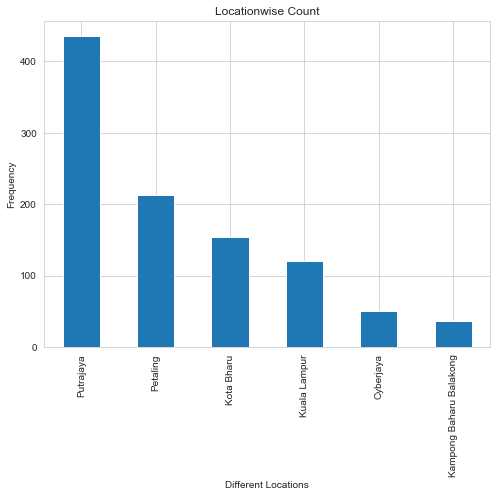

In [66]:
ax = df['Location'].value_counts().plot(kind='bar',figsize=(8,6),title="Locationwise Count")
ax.set_xlabel("Different Locations")
ax.set_ylabel("Frequency")
plt.show()

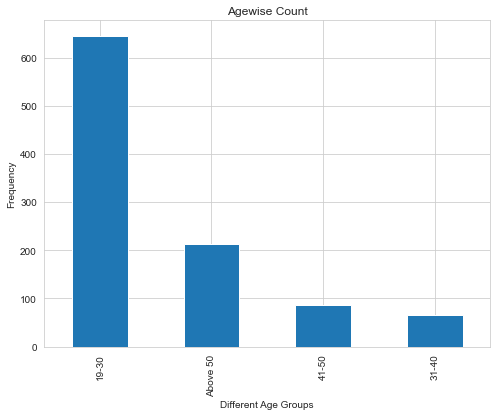

In [67]:
ax = df['Age'].value_counts().plot(kind='bar',figsize=(8,6),title="Agewise Count")
ax.set_xlabel("Different Age Groups")
ax.set_ylabel("Frequency")
plt.show()

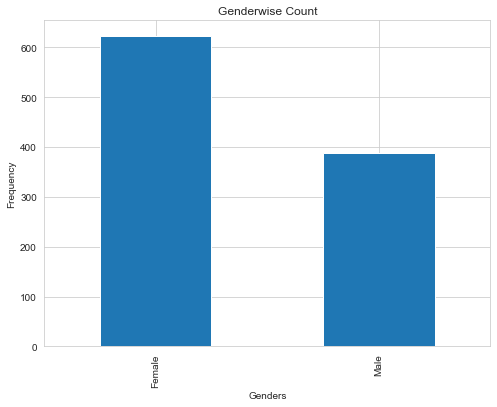

In [68]:
ax = df['Gender'].value_counts().plot(kind='bar',figsize=(8,6),title="Genderwise Count")
ax.set_xlabel("Genders")
ax.set_ylabel("Frequency")
plt.show()

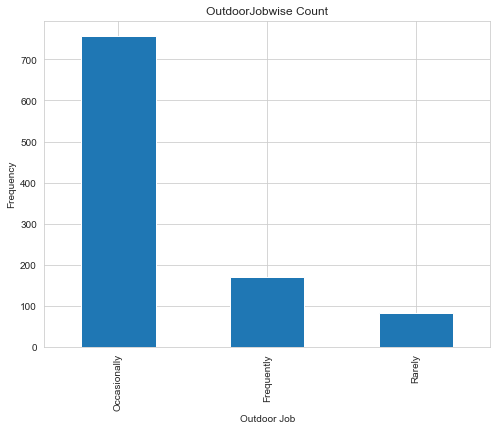

In [69]:
ax = df['OutdoorJob'].value_counts().plot(kind='bar',figsize=(8,6),title="OutdoorJobwise Count")
ax.set_xlabel("Outdoor Job")
ax.set_ylabel("Frequency")
plt.show()

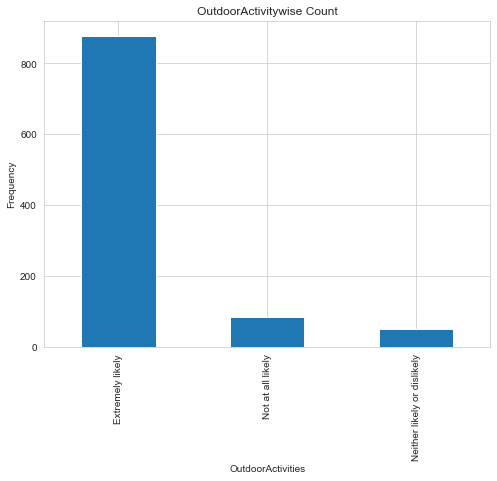

In [70]:
ax = df['OutdoorActivities'].value_counts().plot(kind='bar',figsize=(8,6),title="OutdoorActivitywise Count")
ax.set_xlabel("OutdoorActivities")
ax.set_ylabel("Frequency")
plt.show()

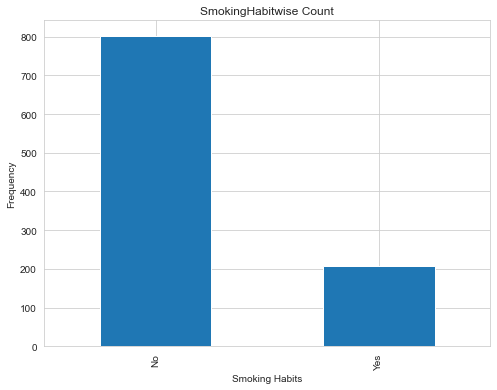

In [71]:
ax = df['SmokingHabit'].value_counts().plot(kind='bar',figsize=(8,6),title="SmokingHabitwise Count")
ax.set_xlabel("Smoking Habits")
ax.set_ylabel("Frequency")
plt.show()

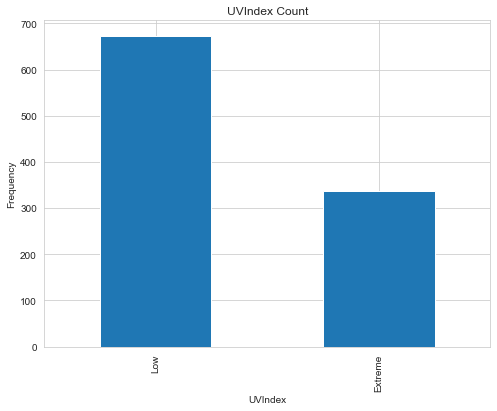

In [72]:
ax = df['UVIndex'].value_counts().plot(kind='bar',figsize=(8,6),title="UVIndex Count")
ax.set_xlabel("UVIndex")
ax.set_ylabel("Frequency")
plt.show()

### Let's Look at the Different Visualizations: Continuous Features

array([[<AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'WindSpeed'}>,
        <AxesSubplot:title={'center':'ACTScore'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

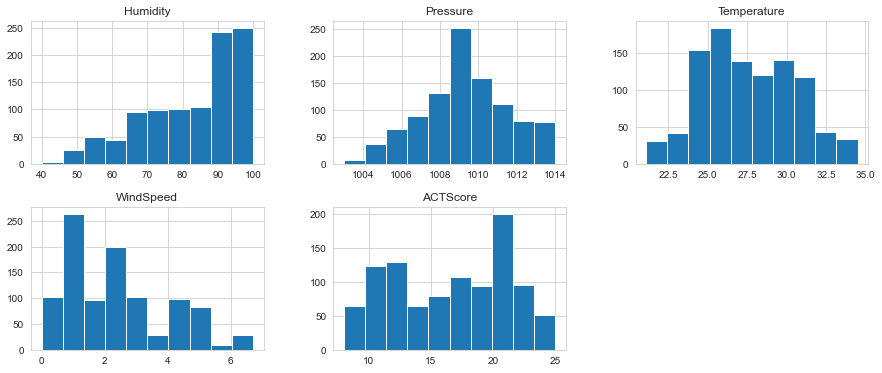

In [73]:
df.hist(figsize=(15,30),layout=(9,3))

### Target Variable: Visualization

C:\Users\AI04834\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ACTScore'>

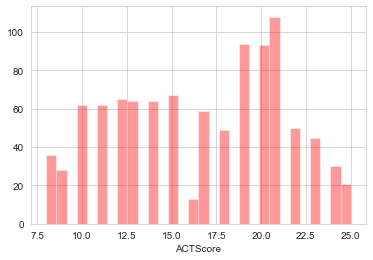

In [74]:
sns.set_style('whitegrid')
sns.distplot(df['ACTScore'], kde = False, color ='red', bins = 30)

### Labelwise Encoding of Categorical Features

In [75]:
from sklearn.preprocessing import LabelEncoder
df['Location'] = LabelEncoder().fit_transform(df.Location)
df['Age'] = LabelEncoder().fit_transform(df.Age)
df['Gender'] = LabelEncoder().fit_transform(df.Gender)
df['OutdoorJob'] = LabelEncoder().fit_transform(df.OutdoorJob)
df['OutdoorActivities'] = LabelEncoder().fit_transform(df.OutdoorActivities)
df['SmokingHabit'] = LabelEncoder().fit_transform(df.SmokingHabit)
df['UVIndex'] = LabelEncoder().fit_transform(df.UVIndex)
df.head()

,Location,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,4,3,1,1,0,0,100,1011,23.9,1,6.7,14
1,4,3,1,1,0,0,94,1010,25.0,1,0.8,15
2,4,3,1,1,0,0,88,1008,23.9,0,3.1,15
3,4,3,1,1,0,0,94,1009,22.7,1,1.1,13
4,4,3,1,1,0,0,83,1008,24.9,1,5.1,15


## Inter-Relationship of Different Parameters

<AxesSubplot:>

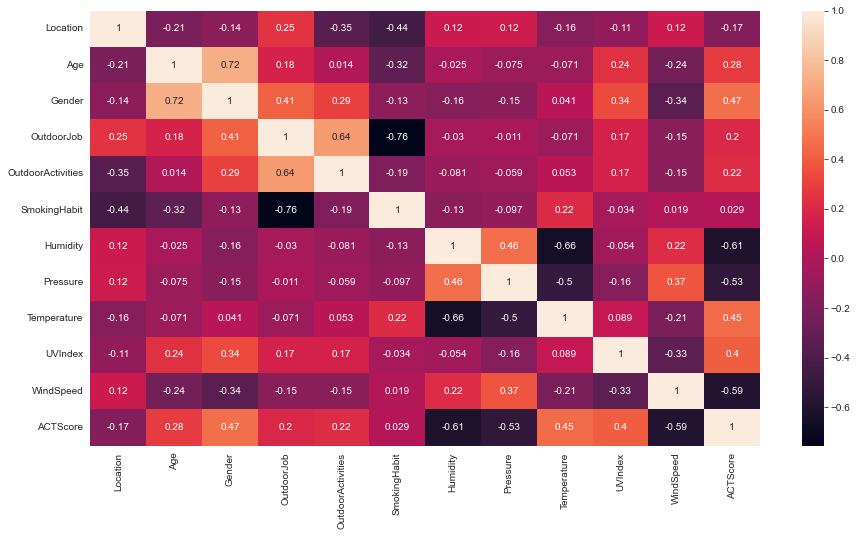

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

## Importance of Different Features

In [77]:
#Diving the Dataset by Target Variable
y = df['ACTScore']
X = df.drop(['ACTScore'],axis=1)

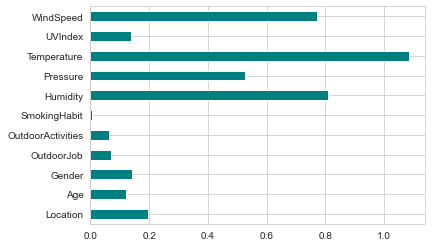

In [78]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns)
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [79]:
#chi2 Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Chi2_Score']  ## naming the dataframe columns
print(featureScores.nlargest(11,'Chi2_Score'))  ## print 11 best features

             Features   Chi2_Score
6            Humidity  1004.780577
10          WindSpeed   457.024248
1                 Age   288.117740
2              Gender   191.402013
4   OutdoorActivities   133.558166
8         Temperature    98.671579
9             UVIndex    86.372347
0            Location    24.715188
3          OutdoorJob    22.784614
5        SmokingHabit    22.451793
7            Pressure     1.641184


As there are very less number of features, hence we won't drop anything except 'Location' for generalization of data.

In [80]:
df = df.drop(['Location'],axis=1)
df.head()

,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,3,1,1,0,0,100,1011,23.9,1,6.7,14
1,3,1,1,0,0,94,1010,25.0,1,0.8,15
2,3,1,1,0,0,88,1008,23.9,0,3.1,15
3,3,1,1,0,0,94,1009,22.7,1,1.1,13
4,3,1,1,0,0,83,1008,24.9,1,5.1,15


As we want to Produce Alert depending on the ACTScore, hence we will Categorize 'ACTScore'

### Categorizing Target Variable ACTScore

In [81]:
df['ACTScore'] = pd.cut(df.ACTScore,bins=[0,15,19,25],labels=['High','Moderate','Low'])
df.head()

,Age,Gender,OutdoorJob,OutdoorActivities,SmokingHabit,Humidity,Pressure,Temperature,UVIndex,WindSpeed,ACTScore
0,3,1,1,0,0,100,1011,23.9,1,6.7,High
1,3,1,1,0,0,94,1010,25.0,1,0.8,High
2,3,1,1,0,0,88,1008,23.9,0,3.1,High
3,3,1,1,0,0,94,1009,22.7,1,1.1,High
4,3,1,1,0,0,83,1008,24.9,1,5.1,High


C:\Users\AI04834\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ACTScore', ylabel='count'>

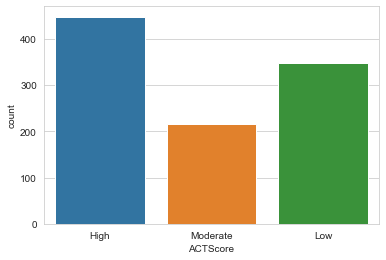

In [82]:
#Plotting Target Variable
sns.countplot(df['ACTScore'])

We can notice Imbalance Class Labels, hence we need to Balance Them.

We will generate Synthetic Data Points for the classes with lower count using SMOTE Algorithm

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=42)
X, y = sm.fit_resample(df.drop('ACTScore', axis=1), df['ACTScore'])
df = pd.concat([pd.DataFrame(y), pd.DataFrame(X)], axis=1)

C:\Users\AI04834\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ACTScore', ylabel='count'>

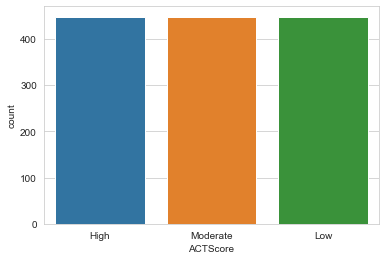

In [84]:
#Plotting Target Variable
sns.countplot(df['ACTScore'])

### Splitting Test & Train Datasets and Target Variable from other features

In [85]:
y = df["ACTScore"]
X = df[["Age","Gender","OutdoorJob","OutdoorActivities","SmokingHabit","Humidity","Pressure","Temperature","UVIndex","WindSpeed"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

## Applying of Different Machine Learning Models

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\AI04834\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


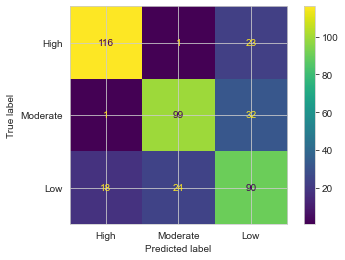

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['High', 'Moderate', 'Low'])
cm_display.plot()
plt.show()

In [88]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.85925926 0.7983871  0.62068966]
recall: [0.82857143 0.75       0.68181818]
fscore: [0.84363636 0.7734375  0.64981949]
support: [140 132 132]


### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 15, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

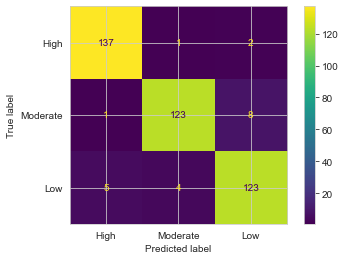

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['High', 'Moderate', 'Low'])
cm_display.plot()
plt.show()

In [91]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95804196 0.9609375  0.92481203]
recall: [0.97857143 0.93181818 0.93181818]
fscore: [0.96819788 0.94615385 0.92830189]
support: [140 132 132]


## Explainable AI to Understand contribution of Different Parameters

In [92]:
import numpy as np
import random
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                                   mode="classification",
                                                   feature_names=X_train.columns,
                                                   categorical_features=[0,1,2,3,4,5,9],
                                                   class_names=['High','Low','Moderate']
                                                  )


idx = random.randint(0,len(X_test)-1)
exp = lime_explainer.explain_instance(data_row = X_test.iloc[idx], 
                                      predict_fn=model.predict_proba,
                                      top_labels=3)

C:\Users\AI04834\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
print("True Label: ", y_test.iloc[idx])
print("Predicted Label: ", y_pred[idx])
exp.show_in_notebook()

True Label:  Low
Predicted Label:  Low


### Random Forest is giving the Best Evaluation Scores.

### We will use the Model to generate a Streamlit App.

### by Joyojyoti Acharya (AI04834)